In [177]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_drug_df,clinical_trial_df,how="outer",on="Mouse ID")


# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [178]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupby_drug_timepoint=combined_df.groupby(["Drug","Timepoint"])
mean_tumor=groupby_drug_timepoint["Tumor Volume (mm3)"].mean()
#mean_tumor.head()

# Convert to DataFrame and also rename the column at from "Tumor Volume(mm3)" to "Average Tumor Volume"
mean_tumor_df=pd.DataFrame({"Average Tumor Volume":mean_tumor})

#In order to use .pivor(), we have you reset the index after using groupby 
mean_tumor_df=mean_tumor_df.reset_index()

# Preview DataFrame
mean_tumor_df.head()


,Drug,Timepoint,Average Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [179]:
#Rearrange the format of the dataframe for graphing purposes later
tumor_mean_pivot = mean_tumor_df.pivot(index = 'Timepoint',columns='Drug')["Average Tumor Volume"]
tumor_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [180]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tumor=groupby_drug_timepoint["Tumor Volume (mm3)"].sem()

#standard_error_tumor
standard_error_tumor
# Convert to DataFrame
standard_error_tumor_df=pd.DataFrame({"Standard Error of Tumor":standard_error_tumor})
standard_error_tumor_df=standard_error_tumor_df.reset_index()

standard_error_tumor_df.head(5)

,Drug,Timepoint,Standard Error of Tumor
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [181]:
standard_error_pivot=standard_error_tumor_df.pivot(index="Timepoint",columns="Drug")["Standard Error of Tumor"]
standard_error_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


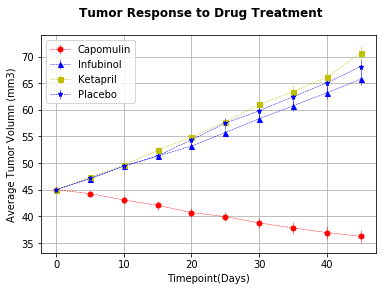

In [182]:
# Generate the Plot (with Error Bars)
x_axis=np.arange(0,50,5)

#Boiler plate in order to graph muliple graphs in the same canvas
fig, ax=plt.subplots()

ax.errorbar(x_axis,tumor_mean_pivot["Capomulin"],standard_error_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,tumor_mean_pivot["Infubinol"],standard_error_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,tumor_mean_pivot["Ketapril"],standard_error_pivot["Ketapril"], color="y", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,tumor_mean_pivot["Placebo"],standard_error_pivot["Placebo"], color="b", marker="*", markersize=5, linestyle="dashed", linewidth=0.50)

#https://matplotlib.org/3.1.1/api/markers_api.html (matplotlib marker guide)

fig.suptitle("Tumor Response to Drug Treatment ", fontsize=12, fontweight="bold")
ax.set_xlabel("Timepoint(Days)")
ax.set_ylabel("Average Tumor Volumn (mm3)")

plt.grid()

plt.legend(loc="best")

#Save the figure
plt.savefig("Result Graph/Tumor_Response_To_Treatment.png")

In [183]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [184]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
groupby_drug_timepoint=combined_df.groupby(["Drug","Timepoint"])
mean_met_site=groupby_drug_timepoint["Metastatic Sites"].mean()
#mean_met_site

# Convert to DataFrame and rename the column from "Metastatic Sites" to "Metastatic Sites Mean"
mean_met_site_df=pd.DataFrame({"Metastatic Sites Mean":mean_met_site})

#Reset the index for .pivot() later 
mean_met_site_df=mean_met_site_df.reset_index()

# Preview DataFrame
mean_met_site_df.head()

,Drug,Timepoint,Metastatic Sites Mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [185]:
mean_met_site_pivot=mean_met_site_df.pivot(index="Timepoint",columns="Drug")["Metastatic Sites Mean"]
mean_met_site_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [186]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_MetSite=groupby_drug_timepoint["Metastatic Sites"].sem()
standard_error_MetSite

# Convert to DataFrame and rename the column name from "Metastatic Sites" to "Metastatic Sites Std. Error."
standard_error_MetSite_df=pd.DataFrame({"Metastatic Sites Std. Error.":standard_error_MetSite})

#Reset index for .pivot() method later 
standard_error_MetSite_df=standard_error_MetSite_df.reset_index()

# Preview DataFrame
standard_error_MetSite_df.head()

,Drug,Timepoint,Metastatic Sites Std. Error.
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [187]:
standard_error_Met_pivot=standard_error_MetSite_df.pivot(index="Timepoint",columns="Drug")["Metastatic Sites Std. Error."]
standard_error_Met_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


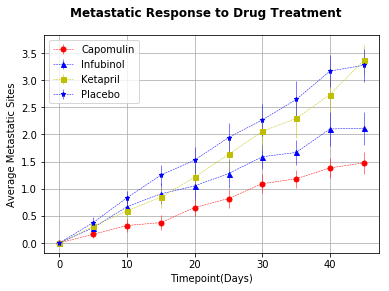

In [188]:
# Generate the Plot (with Error Bars)

x_axis=np.arange(0,50,5)

#Boiler plate in order to graph muliple graphs in the same canvas
fig, ax=plt.subplots()

#https://matplotlib.org/3.1.1/api/markers_api.html (matplotlib marker guide)
ax.errorbar(x_axis,mean_met_site_pivot["Capomulin"],standard_error_Met_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,mean_met_site_pivot["Infubinol"],standard_error_Met_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,mean_met_site_pivot["Ketapril"],standard_error_Met_pivot["Ketapril"], color="y", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,mean_met_site_pivot["Placebo"],standard_error_Met_pivot["Placebo"], color="b", marker="*", markersize=5, linestyle="dashed", linewidth=0.50)


fig.suptitle("Metastatic Response to Drug Treatment", fontsize=12, fontweight="bold")
ax.set_xlabel("Timepoint(Days)")
ax.set_ylabel("Average Metastatic Sites")

plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("Result Graph/Metastatic_Response_To_Treatment.png")

# Show the Figure


## Survival Rates

In [189]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
groupby_drug_timepoint=combined_df.groupby(["Drug","Timepoint"])
grouped_count=groupby_drug_timepoint["Mouse ID"].count()

# Convert to DataFrame
grouped_count_df=pd.DataFrame({"Mouse Count":grouped_count})

#Reset the index for later .pivto() purposes
grouped_count_df=grouped_count_df.reset_index()

# Preview DataFrame
grouped_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [190]:
grouped_count_pivot=grouped_count_df.pivot(index="Timepoint",columns="Drug")["Mouse Count"]
grouped_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [191]:
#Calculate the total of mouse receiving the four drugs 
Capomulin_mouse_total=grouped_count_pivot.iloc[0,0]
#Capomulin_mouse_total

Infubinol_mouse_total=grouped_count_pivot.iloc[0,2]
#Infubinol_mouse_total

Ketapril_mouse_total=grouped_count_pivot.iloc[0,3]
#Ketapril_mouse_total

Placebo_mouse_total=grouped_count_pivot.iloc[0,5]
#Placebo_mouse_total

In [192]:
#Calculate the percentage of survival for each drug, and make each percentage to a list.
Capomulin_count=grouped_count_pivot["Capomulin"]
Capomulin_count_percentage=(Capomulin_count/Capomulin_mouse_total).tolist()
#Capomulin_count_percentage

Infubinol_count=grouped_count_pivot["Infubinol"]
Infubinol_count_percentage=(Infubinol_count/Infubinol_mouse_total).tolist()
#Infubinol_count_percentage

Ketapril_count=grouped_count_pivot["Ketapril"]
Ketapril_count_percentage=(Ketapril_count/Ketapril_mouse_total).tolist()
#Ketapril_count_percentage

Placebo_count=grouped_count_pivot["Placebo"]
Placebo_count_percentage=(Placebo_count/Placebo_mouse_total).tolist()
#Placebo_count_percentage

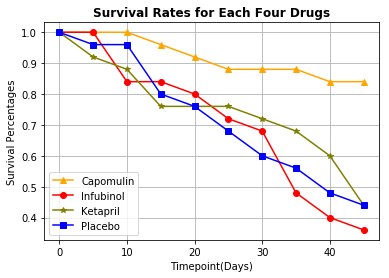

In [193]:
#x_axis=["0","5","10","15","20","25","30","35","40","45"] is more cumbersome way.

x_axis=np.arange(0,50,5)

# Matplotlib marker guide: https://matplotlib.org/3.1.1/api/markers_api.html
# Matplotlib color guide: https://matplotlib.org/examples/color/named_colors.html
plt.plot(x_axis,Capomulin_count_percentage,color="orange",marker="^",label="Capomulin")
plt.plot(x_axis,Infubinol_count_percentage,color="red",marker="o",label="Infubinol")
plt.plot(x_axis,Ketapril_count_percentage,color="olive",marker="*",label="Ketapril")
plt.plot(x_axis,Placebo_count_percentage,color="blue",marker="s",label="Placebo")

plt.grid()

#We are not using dataframe to plot here, so we need to unpack our object for legend purposes
plt.legend()

plt.title("Survival Rates for Each Four Drugs",fontweight="bold")
plt.xlabel("Timepoint(Days)")
plt.ylabel("Survival Percentages")

# Save the Figure
plt.savefig("Result Graph/Survival_Rate.png")

# Show the Figure, this step is unnecessary
#plt.show()

## Summary Bar Graph

In [194]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [195]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()